 # Super Store Sale Prediction

### Load Required Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data Set 

In [2]:
data = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### 1 Data Exploration / Data Understanding 

In [3]:
# It give Top 3 Rows of Data
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [4]:
# It give Rows and Column 
data.shape

(9800, 18)

In [5]:
# It Gives Data Information 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# It Gives Data Type of Column 
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
# It gives Descriptive Statistics Calculation
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
# It Gives all The Column Name 
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

### 2 . Data Cleaning

#### Removing Unwanted Data 

In [9]:
df= data.drop(["Row ID","Order ID","Customer ID","Product ID"],axis=1)

In [10]:
# Checking 
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


### a) Missing Value (Find and Treatment )

In [11]:
df.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [12]:
df[df["Postal Code"].isnull()]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [13]:
# Treatment
df["Postal Code"] = df["Postal Code"].fillna(5402)
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [14]:
# Cheking 
df[df["City"] == "Burlington"]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
683,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,26/12/2018,01/01/2019,Standard Class,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Newell 336,23.968
1039,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Staples in misc. colors,28.728
1393,03/07/2018,04/07/2018,First Class,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,19/10/2018,26/10/2018,Standard Class,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


### b) Duplicate 

In [15]:
df.duplicated().sum()

1

### c) Structural Error 

In [16]:
df['Order Date'].unique()

array(['08/11/2017', '12/06/2017', '11/10/2016', ..., '18/06/2015',
       '28/02/2018', '09/05/2016'], dtype=object)

In [17]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [18]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
df['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless',
       'LG G2'], dtype=object)

In [20]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

### d) Outliers 

<Axes: >

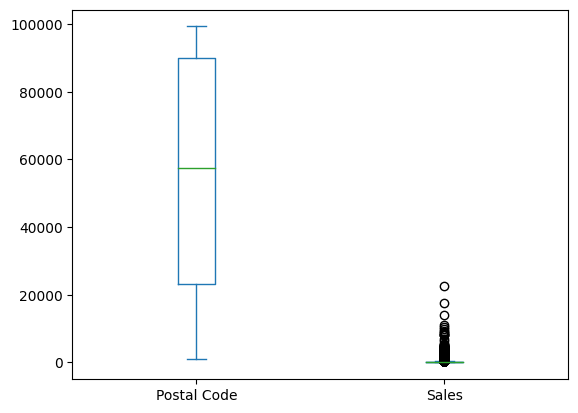

In [21]:
df.plot(kind='box')

###  Modification Related to Date

In [22]:
# Creating New Column of Sales Month
df["Month"] = df["Order Date"].str[3:5]
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,06
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,05
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,01
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,01
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,01


In [23]:
df["Month"]  = df["Month"].astype(np.int32)
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,5
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,1
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,1
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,1


In [24]:
# Convert Month into List
d = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
d

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [25]:
df["Month"] =[d[i] for i in df["Month"]]
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January


In [26]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,2017-06-12,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January
9797,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January
9798,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January


In [27]:
df["Year"] = df["Order Date"].dt.year
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-06-12,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May,2017
9796,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January,2016
9797,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January,2016
9798,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January,2016


In [28]:
df["Year"].value_counts()

Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

In [29]:
df["Month"].value_counts()

Month
November     1449
December     1382
September    1354
October       809
May           725
July          697
August        693
June          691
March         680
April         657
January       366
February      297
Name: count, dtype: int64

### 3 Data Visulization 

In [30]:
# 1 Which Month More Sales
df_no_dates = df.drop(columns=["Order Date"])

In [31]:
months_df = df_no_dates.groupby("Month").sum()
months_df

,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Year
Month,,,,,,,,,,,,,,
April,20/04/201822/04/201622/04/201622/04/201622/04/...,Standard ClassStandard ClassStandard ClassStan...,Andrew AllenDarren PowersDarren PowersDarren P...,ConsumerConsumerConsumerConsumerConsumerHome O...,United StatesUnited StatesUnited StatesUnited ...,ConcordNew AlbanyNew AlbanyNew AlbanyNew Alban...,North CarolinaIndianaIndianaIndianaIndianaIlli...,34472176.0,SouthCentralCentralCentralCentralCentralSouthS...,Office SuppliesOffice SuppliesOffice SuppliesF...,PaperBindersLabelsFurnishingsChairsChairsChair...,Xerox 1967C-Line Peel & Stick Add-On Filing Po...,136283.0006,1324950
August,01/09/201501/09/201501/09/201502/09/201702/09/...,Second ClassSecond ClassSecond ClassStandard C...,Zuschuss DonatelliZuschuss DonatelliZuschuss D...,ConsumerConsumerConsumerHome OfficeHome Office...,United StatesUnited StatesUnited StatesUnited ...,San FranciscoSan FranciscoSan FranciscoChicago...,CaliforniaCaliforniaCaliforniaIllinoisIllinois...,39887477.0,WestWestWestCentralCentralCentralEastEastEastE...,Office SuppliesTechnologyOffice SuppliesOffice...,ArtPhonesBindersPaperAccessoriesBindersFastene...,Newell 341Cisco SPA 501G IP PhoneWilson Jones ...,157315.9270,1397545
December,10/12/201713/12/201713/12/201710/12/201710/12/...,Standard ClassStandard ClassStandard ClassFirs...,Irene MaddoxKen BlackKen BlackGene HaleGene Ha...,ConsumerCorporateCorporateCorporateCorporateHo...,United StatesUnited StatesUnited StatesUnited ...,SeattleFremontFremontRichardsonRichardsonHoust...,WashingtonNebraskaNebraskaTexasTexasTexasTexas...,79735933.0,WestCentralCentralCentralCentralCentralCentral...,Office SuppliesOffice SuppliesOffice SuppliesT...,BindersArtAppliancesPhonesFurnishingsEnvelopes...,Fellowes PB200 Plastic Comb Binding MachineNew...,321480.1695,2787094
February,05/02/201805/02/201805/02/201813/02/201604/03/...,First ClassFirst ClassFirst ClassSecond ClassS...,Dorothy WardleDorothy WardleDorothy WardleMich...,CorporateCorporateCorporateCorporateConsumerCo...,United StatesUnited StatesUnited StatesUnited ...,ColumbusColumbusColumbusDallasColumbiaColumbia...,OhioOhioOhioTexasTennesseeTennesseeCaliforniaW...,16533469.0,EastEastEastCentralSouthSouthWestCentralWestEa...,TechnologyOffice SuppliesOffice SuppliesTechno...,PhonesPaperFastenersAccessoriesChairsChairsCha...,Anker 36W 4-Port USB Wall Charger Travel Power...,59371.1154,598997
January,20/01/201720/01/201705/02/201605/02/201605/02/...,Second ClassSecond ClassSecond ClassSecond Cla...,Eric HoffmannEric HoffmannKarl BraunKarl Braun...,ConsumerConsumerConsumerConsumerConsumerCorpor...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesLos AngelesMinneapolisMinneapolisMi...,CaliforniaCaliforniaMinnesotaMinnesotaMinnesot...,20406756.0,WestWestCentralCentralCentralEastEastEastEastE...,Office SuppliesTechnologyOffice SuppliesFurnit...,BindersAccessoriesPaperFurnishingsBindersLabel...,Wilson Jones Active Use BindersImation 8GB Min...,94291.6296,738154
July,18/07/201822/07/201722/07/201722/07/201713/07/...,Second ClassStandard ClassStandard ClassStanda...,Sandra FlanaganRuben AusmanAlice McCarthyAlice...,ConsumerCorporateCorporateCorporateCorporateCo...,United StatesUnited StatesUnited StatesUnited ...,PhiladelphiaLos AngelesGrand PrairieGrand Prai...,PennsylvaniaCaliforniaTexasTexasPennsylvaniaPe...,38081551.0,EastWestCentralCentralEastEastWestWestWestWest...,FurnitureOffice SuppliesOffice SuppliesOffice ...,ChairsStorageStoragePaperBindersPaperAccessori...,"Global Deluxe Stacking Chair, GrayEldon Base f...",145535.6890,1405652
June,16/06/201714/06/201514/06/201514/06/201514/06/...,Second ClassStandard ClassStandard ClassStanda...,Darrin Van HuffBrosina HoffmanBrosina HoffmanB...,CorporateConsumerConsumerConsumerConsumerConsu...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesLos AngelesLos AngelesLos AngelesLo...,CaliforniaCalifornia

In [32]:
months_df = months_df[["Sales"]]
months_df

,Sales
Month,
April,136283.0006
August,157315.9270
December,321480.1695
February,59371.1154
January,94291.6296
July,145535.6890
June,145837.5233
March,197573.5872
May,154086.7237


In [33]:
months_df.reset_index(inplace = True)
months_df

,Month,Sales
0,April,136283.0006
1,August,157315.9270
2,December,321480.1695
3,February,59371.1154
4,January,94291.6296
5,July,145535.6890
6,June,145837.5233
7,March,197573.5872
8,May,154086.7237
9,November,350161.7110


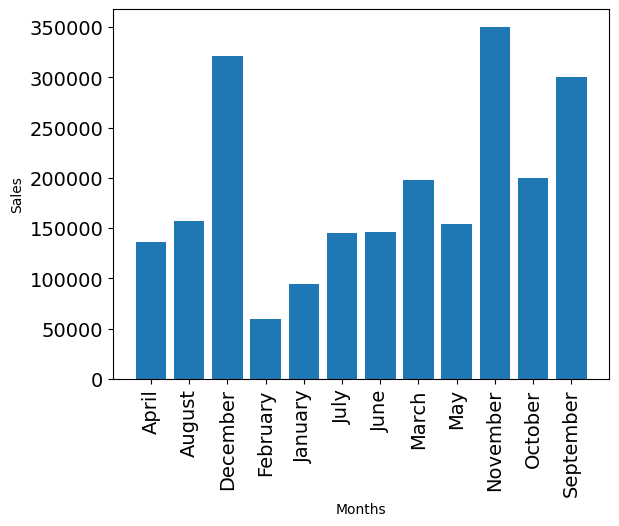

In [34]:
# Month Sales Bar Graph
plt.bar(months_df["Month"], months_df["Sales"])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [35]:
# 2. Sales Distribution by Category and Sub-Category

In [36]:
# Group by Category and Sub-Category, summing up Sales
sales_category = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack()
sales_category

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,113813.1987,322822.731,NaN,NaN,NaN,89212.018,NaN,NaN,NaN,NaN,NaN,NaN,202810.628
Office Supplies,NaN,104618.403,26705.41,200028.785,NaN,NaN,NaN,16128.046,3001.96,NaN,12347.726,NaN,76828.304,NaN,219343.392,46420.308,NaN
Technology,164186.7,NaN,NaN,NaN,NaN,NaN,146248.094,NaN,NaN,NaN,NaN,189238.631,NaN,327782.448,NaN,NaN,NaN


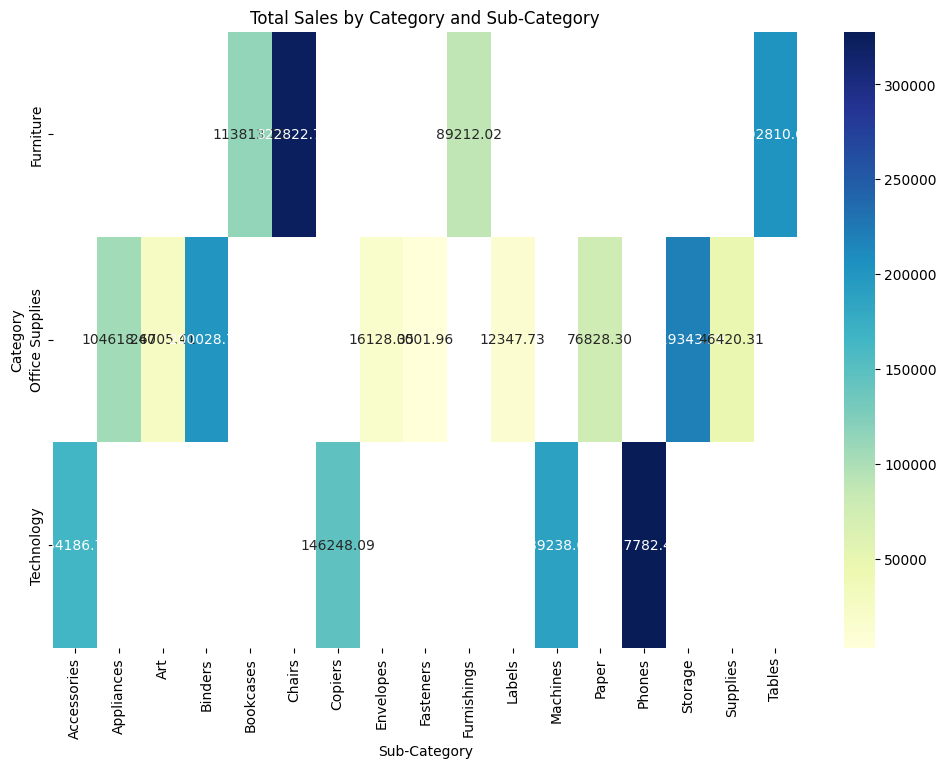

In [37]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_category, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Total Sales by Category and Sub-Category')
plt.show()

In [38]:
# 3.Top Performing Products

In [39]:
# Group by Product Name and sum Sales
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)

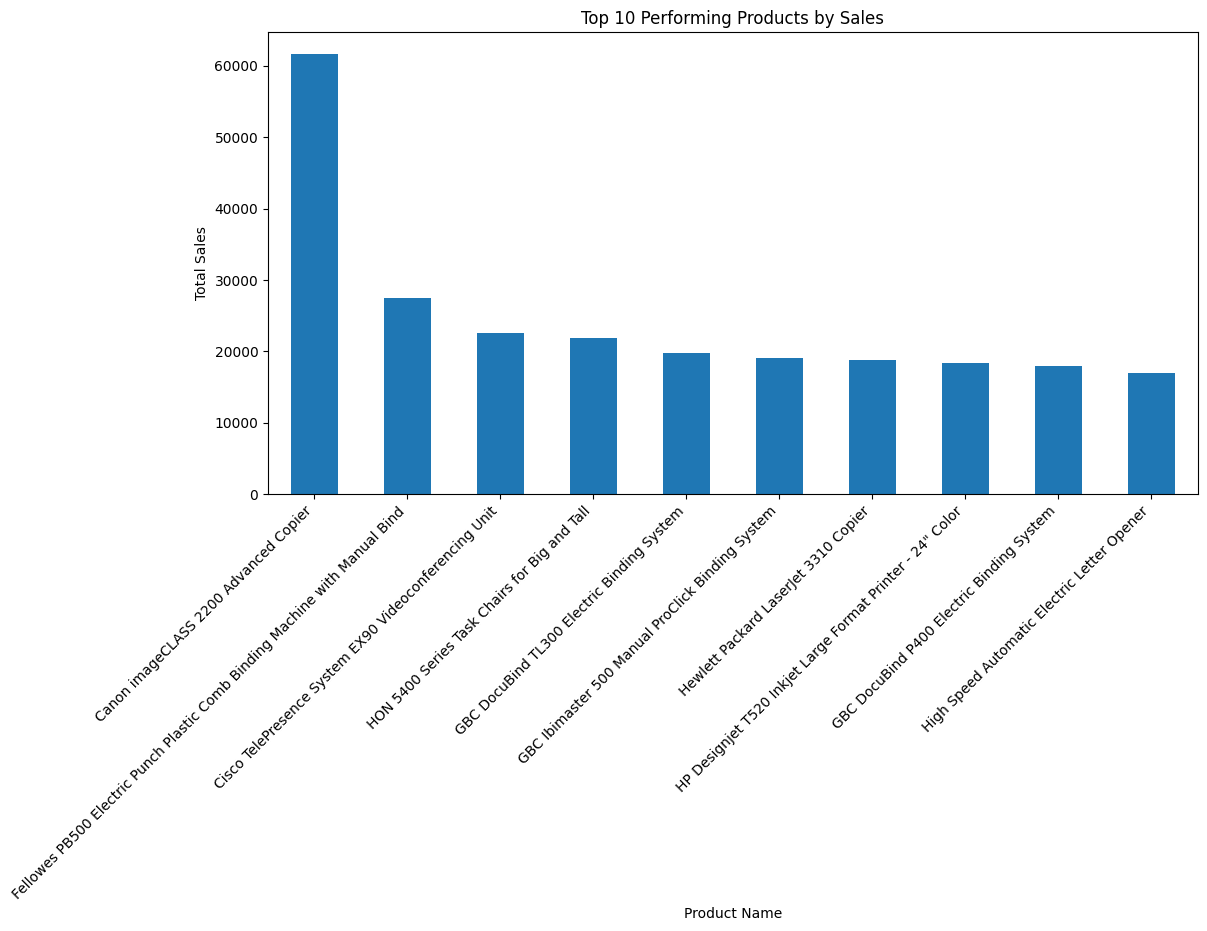

In [40]:
# Plot the top products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Performing Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
# 4. Sales by Region

In [42]:
# Group by Region and sum Sales
sales_region = df.groupby('Region')['Sales'].sum()

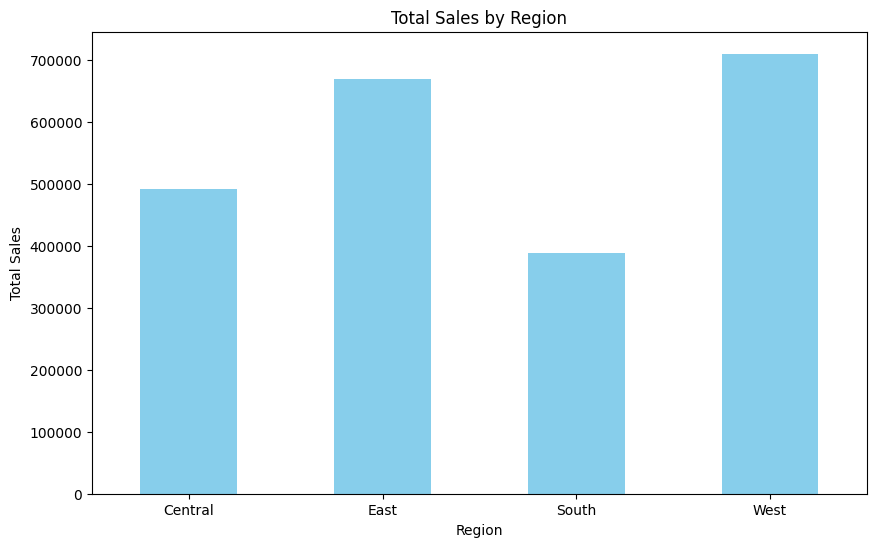

In [43]:
# Plot the sales by region
plt.figure(figsize=(10, 6))
sales_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

In [44]:
# 5. Ship Mode Popularity

In [45]:
# Count the number of orders by Ship Mode
ship_mode_counts = df['Ship Mode'].value_counts()

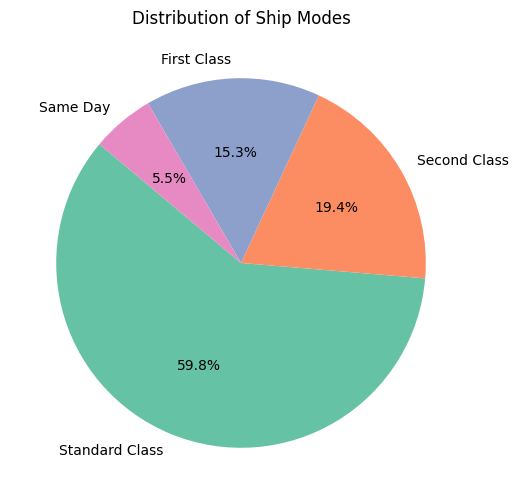

In [46]:
# Plot the ship mode counts
plt.figure(figsize=(8, 6))
ship_mode_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Ship Modes')
plt.ylabel('')
plt.show()

# **Insights of Super store sales EDA**

- **01 Sales Distribution by Category and Sub-Category**
    - **Insight**: Furniture, Office Supplies, and Technology are the main product categories.
    - **Conclusion**: Office Supplies has the highest sales among all categories, with specific sub-categories like Binders and Paper contributing significantly.
- **02 Sales Over Time**
    - **Insight**: Sales trends over time show fluctuations, with some noticeable peaks and troughs.
    - **Conclusion**: Sales tend to spike during certain periods, possibly indicating seasonal trends or successful promotions. Identifying these periods can help in planning future marketing strategies.
- **03 Top Performing Products**
    - **Insight**: Certain products stand out with exceptionally high sales.
    - **Conclusion**: The top 10 products generate a significant portion of total sales. Focusing on promoting these high-performing products can enhance revenue.
- **04 Sales by Region**
    - **Insight**: Sales distribution varies across different regions.
    - **Conclusion**: Some regions like the West and East have higher sales compared to others. Tailoring marketing strategies to leverage strong regions and improve weaker ones could be beneficial.
- **05 Ship Mode Popularity**
    - **Insight**: There is a clear preference for certain shipping modes among customers.
    - **Conclusion**: Standard Class is the most popular shipping mode, suggesting that customers prioritize cost over speed. This insight can help optimize shipping options to balance cost and delivery time.